In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
test_data = pd.read_csv('./test_data/test_run.csv')

In [9]:
test_data.dtypes

poly_group_id      int64
p_index            int64
t_step             int64
x                float64
y                float64
z                float64
n                float64
dtype: object

In [8]:
test_data.head()

,poly_group_id,p_index,t_step,x,y,z,n
0,1234,0,0,0.000000,0.000000,0.000000,21.407501
1,1234,0,0,-0.801509,-0.571061,0.254908,93.864949
2,1234,0,0,1.026887,2.374069,0.442956,108.093917
3,1234,0,0,-2.264091,5.688526,1.532817,123.265817
4,1234,0,0,-1.948813,7.179555,2.202168,125.102433


In [20]:
test_data['sample_id'] = test_data['poly_group_id'].map(str) + '_' + test_data['p_index'].map(str) + '_' + test_data['t_step'].map(str)

In [23]:
test_data['n_next'] = test_data['n'].shift(-1)

In [25]:
test_data['sample_id_next'] = test_data['sample_id'].shift(-1)

In [26]:
test_data.head()

,poly_group_id,p_index,t_step,x,y,z,n,sample_id,n_next,sample_id_next
0,1234,0,0,0.000000,0.000000,0.000000,21.407501,1234_0_0,93.864949,1234_0_0
1,1234,0,0,-0.801509,-0.571061,0.254908,93.864949,1234_0_0,108.093917,1234_0_0
2,1234,0,0,1.026887,2.374069,0.442956,108.093917,1234_0_0,123.265817,1234_0_0
3,1234,0,0,-2.264091,5.688526,1.532817,123.265817,1234_0_0,125.102433,1234_0_0
4,1234,0,0,-1.948813,7.179555,2.202168,125.102433,1234_0_0,133.189484,1234_0_0


In [27]:
def strand_length(row):
    if row['sample_id'] == row['sample_id_next']:
        return row['n_next'] - row['n']
    else:
        return np.nan

In [29]:
test_data['strand_length'] = test_data.apply(strand_length, axis=1)

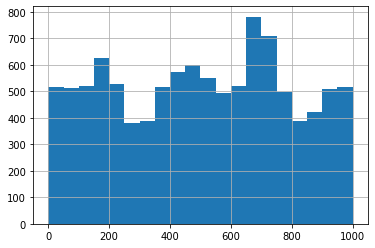

In [13]:
test_data['n'].hist(bins=20)

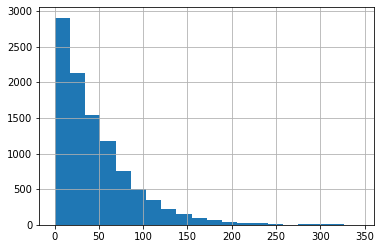

In [30]:
test_data['strand_length'].hist(bins=20)

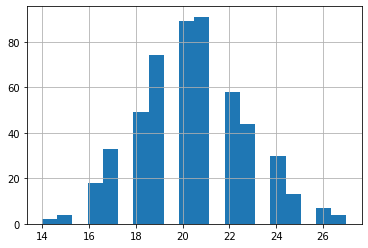

In [33]:
test_data['sample_id'].value_counts().hist(bins=20)